In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 4

x = np.array([0.0,0.1,0.3,0.6,1.0])
f = np.array([-6.00000,-5.89483,-5.65014,-5.17788,-4.28172])
F = np.zeros((n+1,n+1))

F[0][0] = f[0]
F[1][0] = f[1]
F[2][0] = f[2]
F[3][0] = f[3]
F[4][0] = f[4]

for i in range(1,n+1):
    for j in range(1,i+1):
        F[i][j] = (F[i,j-1]-F[i-1][j-1])/(x[i]-x[i-j])
    

In [3]:
print (F)

[[-6.          0.          0.          0.          0.        ]
 [-5.89483     1.0517      0.          0.          0.        ]
 [-5.65014     1.22345     0.5725      0.          0.        ]
 [-5.17788     1.5742      0.7015      0.215       0.        ]
 [-4.28172     2.2404      0.95171429  0.27801587  0.06301587]]


In [5]:
for i in range(n+1):
    print ('F[%.0f][%.0f] = %0.6f' %(i,i,F[i][i]))

F[0][0] = -6.000000
F[1][1] = 1.051700
F[2][2] = 0.572500
F[3][3] = 0.215000
F[4][4] = 0.063016


In [23]:
a0 = F[0][0]-x[0]*F[1][1]+x[0]*x[1]*F[2][2]-x[0]*x[1]*x[2]*F[3][3]+x[0]*x[1]*x[2]*x[3]*F[4][4]

a1 = F[1][1]-(x[0]+x[1])*F[2][2]+(x[0]*x[1]+x[2]*x[1]+x[0]*x[2])*F[3][3]-(x[0]*x[1]*x[2]+x[0]*x[1]*x[3]+x[0]*x[2]*x[3]+x[1]*x[2]*x[3])*F[4][4]

a2 = F[2][2] -(x[0]+x[1]+x[2])*F[3][3] + (x[0]*x[1]+x[0]*x[2]+x[0]*x[3]+x[1]*x[2]+x[1]*x[3]+x[2]*x[3])*F[4][4]

a3 = F[3][3] -(x[0]+x[1]+x[2]+x[3])*F[4][4]

a4 = F[4][4]

In [36]:
print ('%0.8f,%0.8f,%0.8f,%0.8f,%0.8f' % (a0,a1,a2,a3,a4))

-6.00000000,0.99976571,0.50351429,0.15198413,0.06301587


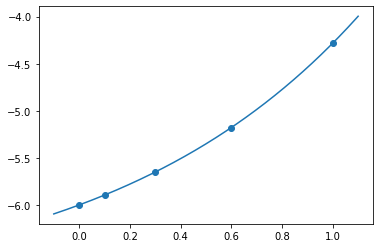

In [31]:
plt.scatter(x,f)
xfit = np.zeros(1000)
for i in range(1000):
    xfit[i] = -0.1+i/(999)*1.2

x2 = xfit**2
yfit = np.zeros(1000)
yfit = a0 + a1*xfit + a2*xfit**2 + a3*xfit**3 + a4*xfit**4
    
plt.plot(xfit,yfit)

In [34]:
# Or, we could realize that this whole thing is just a linear algebra problem, and
# has already been solved countless times before!!!!!!!!!!

pfit = np.polyfit(x,f,4)
print (pfit)
yfit2 = pfit[4] + pfit[3]*xfit + pfit[2]*xfit**2 + pfit[1]*xfit**3 + pfit[0]*xfit**4

[ 0.06301587  0.15198413  0.50351429  0.99976571 -6.        ]


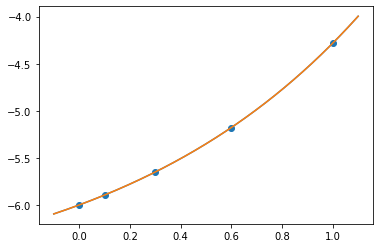

In [35]:
plt.scatter(x,f)
plt.plot(xfit,yfit)
plt.plot(xfit,yfit2)